In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'whitegrid')
from sklearn.model_selection import train_test_split

Duplicate key in file WindowsPath('C:/Users/Hyoungrak Oh/.conda/envs/ETA3.9/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 257 ('font.family: sans-serif')
Duplicate key in file WindowsPath('C:/Users/Hyoungrak Oh/.conda/envs/ETA3.9/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 406 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')


In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
target = train['failure']
# train.drop(columns = ['failure'], inplace = True)
data = pd.concat([train, test], ignore_index = True)

In [3]:
train

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0
26568,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0


In [4]:
test

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,47340,I,144.74,material_7,material_5,9,5,0,4,9,...,18.573,11.691,NaN,19.771,11.562,17.246,15.131,15.209,NaN,696.466
20771,47341,I,74.53,material_7,material_5,9,5,4,8,7,...,17.917,10.980,16.027,15.694,13.564,15.494,15.296,13.812,16.501,613.249
20772,47342,I,67.73,material_7,material_5,9,5,10,11,2,...,19.630,10.436,16.137,20.612,11.134,16.519,15.525,14.175,17.728,783.349
20773,47343,I,126.15,material_7,material_5,9,5,8,16,11,...,19.575,12.672,15.422,19.496,9.319,15.817,17.403,16.437,15.179,745.210


In [5]:
target

0        0
1        0
2        0
3        0
4        0
        ..
26565    0
26566    0
26567    0
26568    0
26569    0
Name: failure, Length: 26570, dtype: int64

In [6]:
data

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0.0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0.0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0.0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0.0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47340,47340,I,144.74,material_7,material_5,9,5,0,4,9,...,11.691,NaN,19.771,11.562,17.246,15.131,15.209,NaN,696.466,NaN
47341,47341,I,74.53,material_7,material_5,9,5,4,8,7,...,10.980,16.027,15.694,13.564,15.494,15.296,13.812,16.501,613.249,NaN
47342,47342,I,67.73,material_7,material_5,9,5,10,11,2,...,10.436,16.137,20.612,11.134,16.519,15.525,14.175,17.728,783.349,NaN
47343,47343,I,126.15,material_7,material_5,9,5,8,16,11,...,12.672,15.422,19.496,9.319,15.817,17.403,16.437,15.179,745.210,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47345 entries, 0 to 47344
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              47345 non-null  int64  
 1   product_code    47345 non-null  object 
 2   loading         46872 non-null  float64
 3   attribute_0     47345 non-null  object 
 4   attribute_1     47345 non-null  object 
 5   attribute_2     47345 non-null  int64  
 6   attribute_3     47345 non-null  int64  
 7   measurement_0   47345 non-null  int64  
 8   measurement_1   47345 non-null  int64  
 9   measurement_2   47345 non-null  int64  
 10  measurement_3   46635 non-null  float64
 11  measurement_4   46398 non-null  float64
 12  measurement_5   46161 non-null  float64
 13  measurement_6   45925 non-null  float64
 14  measurement_7   45688 non-null  float64
 15  measurement_8   45451 non-null  float64
 16  measurement_9   45214 non-null  float64
 17  measurement_10  44978 non-null 

In [8]:
data.columns

Index(['id', 'product_code', 'loading', 'attribute_0', 'attribute_1',
       'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17',
       'failure'],
      dtype='object')

In [9]:
data.attribute_0.unique()

array(['material_7', 'material_5'], dtype=object)

In [10]:
data.attribute_1.unique()

array(['material_8', 'material_5', 'material_6', 'material_7'],
      dtype=object)

In [11]:
sorted(data.attribute_2.unique())

[5, 6, 7, 8, 9]

In [12]:
sorted(data.attribute_3.unique())

[4, 5, 6, 7, 8, 9]

* loading : 유리수 - 제품에 액체를 흡수 시켜서 잘 작동하는지
* attribute_0, 1 : 문자열. material_#. 재료에 대한 설명인 듯 하다. 분명 특정 material에 해당하는 실험이 measurement로 존재할거라 생각
* attribute_2, 3 : int. 왜 정수일까?? 정수인데 범위가 5 ~ 9와 4 ~ 9가 존재함
> product_code가 정해지면 attribute_0 부터 3까지 그 값이 고정됨.


* measurement_0~2 : 유리수. 결측값이 없다. 모든 제품에 대해 다 실행함
* measurement_3~17 : 유리수. 결측값이 있다. 넘버링이 클 수록 결측값의 빈도가 커짐.

In [13]:
for i in data.columns:
    globals()[i] = data[i]

In [14]:
loading

0         80.10
1         84.89
2         82.43
3        101.07
4        188.06
          ...  
47340    144.74
47341     74.53
47342     67.73
47343    126.15
47344     85.97
Name: loading, Length: 47345, dtype: float64

<AxesSubplot:xlabel='loading', ylabel='Count'>

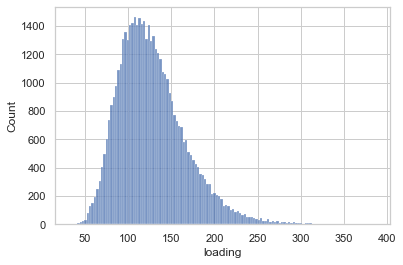

In [15]:
sns.histplot(data = loading)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47345 entries, 0 to 47344
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              47345 non-null  int64  
 1   product_code    47345 non-null  object 
 2   loading         46872 non-null  float64
 3   attribute_0     47345 non-null  object 
 4   attribute_1     47345 non-null  object 
 5   attribute_2     47345 non-null  int64  
 6   attribute_3     47345 non-null  int64  
 7   measurement_0   47345 non-null  int64  
 8   measurement_1   47345 non-null  int64  
 9   measurement_2   47345 non-null  int64  
 10  measurement_3   46635 non-null  float64
 11  measurement_4   46398 non-null  float64
 12  measurement_5   46161 non-null  float64
 13  measurement_6   45925 non-null  float64
 14  measurement_7   45688 non-null  float64
 15  measurement_8   45451 non-null  float64
 16  measurement_9   45214 non-null  float64
 17  measurement_10  44978 non-null 

<AxesSubplot:xlabel='attribute_0', ylabel='count'>

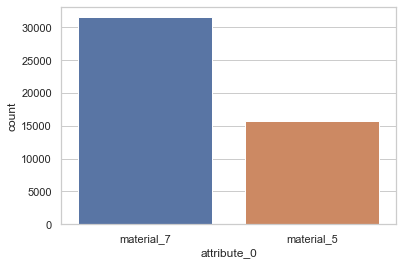

In [17]:
sns.countplot(data = data, x = 'attribute_0')

<AxesSubplot:xlabel='attribute_1', ylabel='count'>

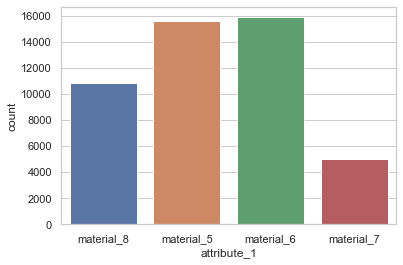

In [18]:
sns.countplot(data = data, x = 'attribute_1')

<AxesSubplot:xlabel='attribute_2', ylabel='count'>

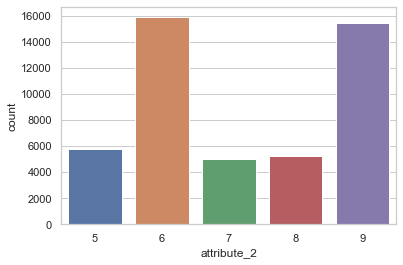

In [19]:
sns.countplot(data = data, x = 'attribute_2')

<AxesSubplot:xlabel='measurement_0', ylabel='Count'>

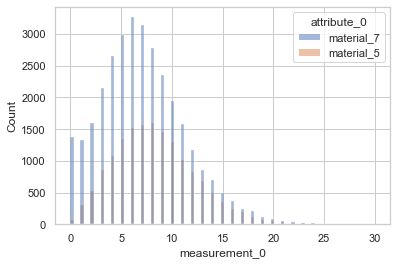

In [20]:
sns.histplot(data = data, x = 'measurement_0', hue = 'attribute_0')

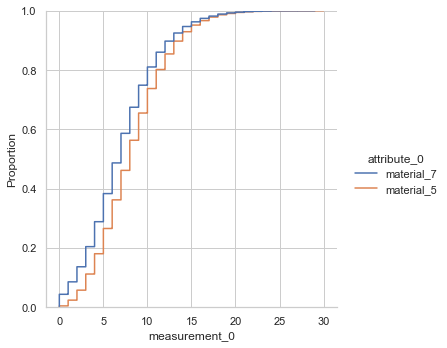

In [21]:
sns.displot(data = data, x = 'measurement_0', hue = 'attribute_0', kind = 'ecdf')
# plt.title('this')

<AxesSubplot:xlabel='measurement_2', ylabel='Count'>

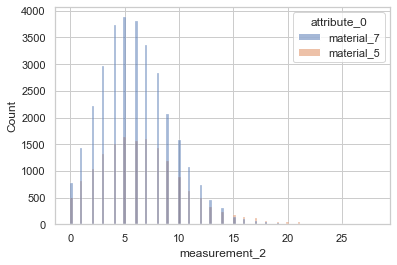

In [22]:
sns.histplot(data = data, x = 'measurement_2', hue = 'attribute_0')

<AxesSubplot:xlabel='measurement_3', ylabel='Count'>

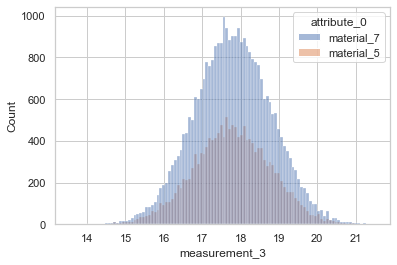

In [23]:
sns.histplot(data = data, x = 'measurement_3', hue = 'attribute_0')

<AxesSubplot:xlabel='measurement_4', ylabel='Count'>

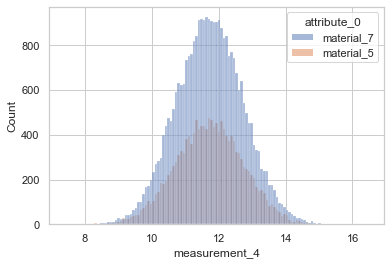

In [24]:
sns.histplot(data = data, x = 'measurement_4', hue = 'attribute_0')

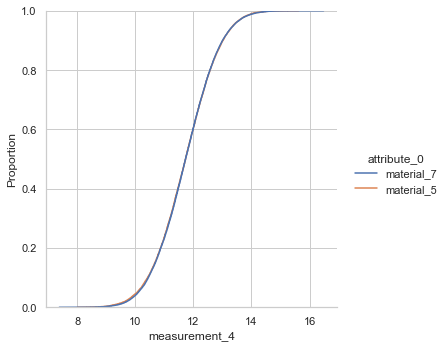

In [25]:
sns.displot(data = data, x = 'measurement_4', hue = 'attribute_0', kind = 'ecdf')

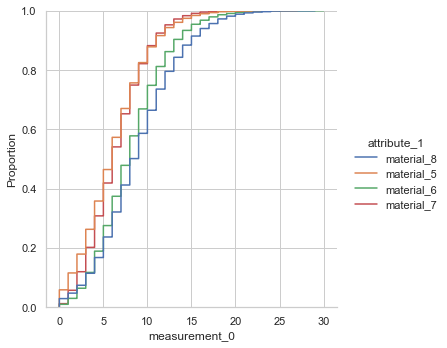

In [26]:
sns.displot(data = data, x = 'measurement_0', hue = 'attribute_1', kind = 'ecdf')

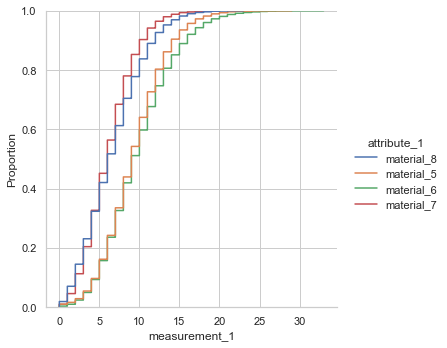

In [27]:
sns.displot(data = data, x = 'measurement_1', hue = 'attribute_1', kind = 'ecdf')

<AxesSubplot:xlabel='measurement_2', ylabel='Count'>

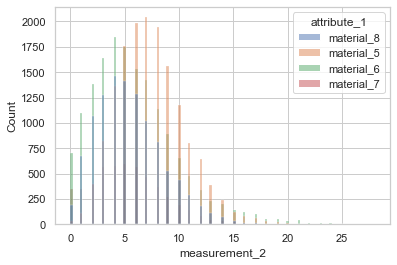

In [28]:
sns.histplot(data = data, x = 'measurement_2', hue = 'attribute_1')

<AxesSubplot:xlabel='measurement_3', ylabel='Count'>

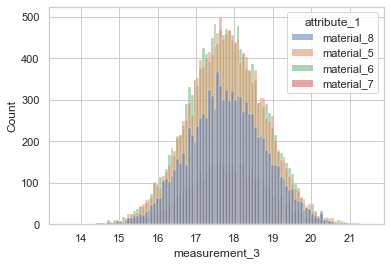

In [29]:
sns.histplot(data = data, x = 'measurement_3', hue = 'attribute_1')

<AxesSubplot:xlabel='measurement_4', ylabel='Count'>

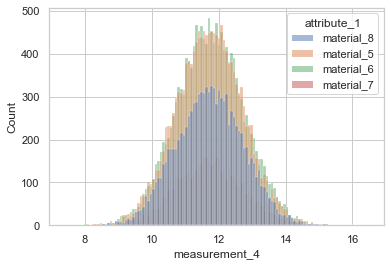

In [30]:
sns.histplot(data = data, x = 'measurement_4', hue = 'attribute_1')

<AxesSubplot:xlabel='measurement_5', ylabel='Count'>

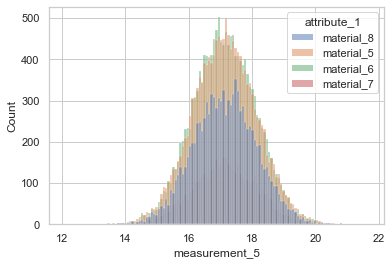

In [31]:
sns.histplot(data = data, x = 'measurement_5', hue = 'attribute_1')

<AxesSubplot:xlabel='measurement_6', ylabel='Count'>

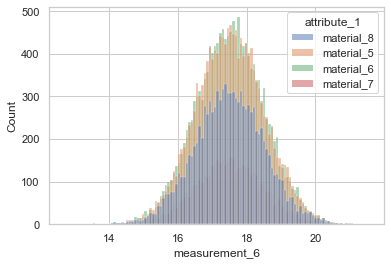

In [32]:
sns.histplot(data = data, x = 'measurement_6', hue = 'attribute_1')

<AxesSubplot:xlabel='measurement_7', ylabel='Count'>

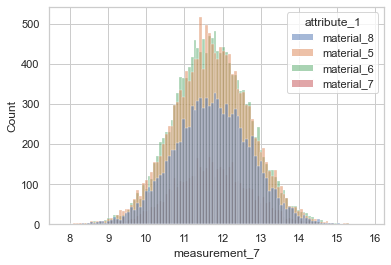

In [33]:
sns.histplot(data = data, x = 'measurement_7', hue = 'attribute_1')

<AxesSubplot:xlabel='measurement_8', ylabel='Count'>

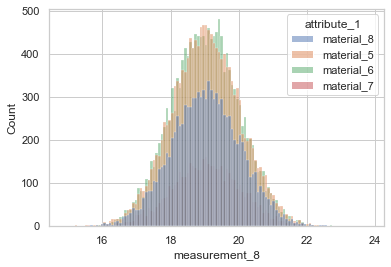

In [34]:
sns.histplot(data = data, x = 'measurement_8', hue = 'attribute_1')

<AxesSubplot:xlabel='measurement_9', ylabel='Count'>

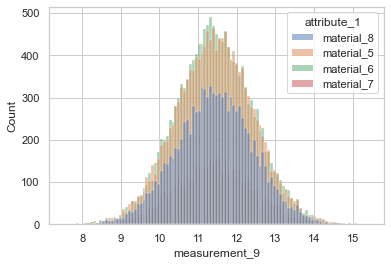

In [35]:
sns.histplot(data = data, x = 'measurement_9', hue = 'attribute_1')

<AxesSubplot:xlabel='measurement_10', ylabel='Count'>

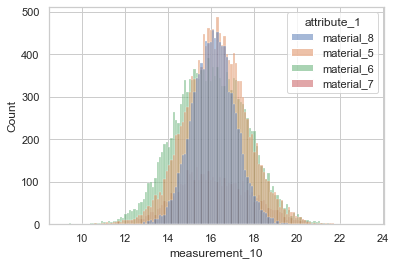

In [36]:
sns.histplot(data = data, x = 'measurement_10', hue = 'attribute_1')

<AxesSubplot:xlabel='measurement_11', ylabel='Count'>

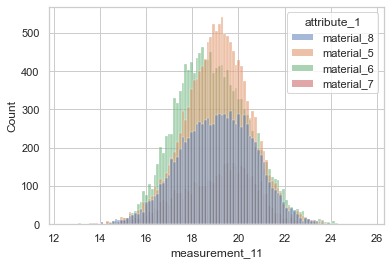

In [37]:
sns.histplot(data = data, x = 'measurement_11', hue = 'attribute_1')

<AxesSubplot:xlabel='measurement_12', ylabel='Count'>

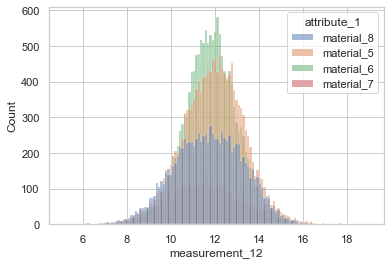

In [38]:
sns.histplot(data = data, x = 'measurement_12', hue = 'attribute_1')

<AxesSubplot:xlabel='measurement_13', ylabel='Count'>

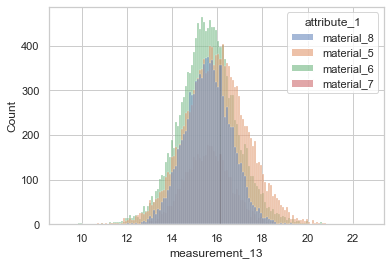

In [39]:
sns.histplot(data = data, x = 'measurement_13', hue = 'attribute_1')

<AxesSubplot:xlabel='measurement_14', ylabel='Density'>

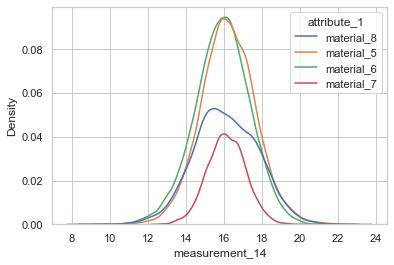

In [40]:
sns.kdeplot(data = data, x = 'measurement_14', hue = 'attribute_1')

<AxesSubplot:xlabel='measurement_15', ylabel='Count'>

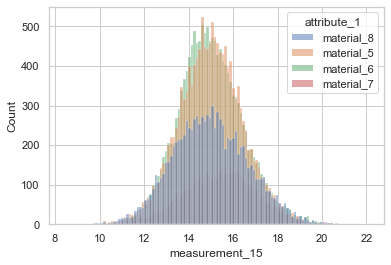

In [41]:
sns.histplot(data = data, x = 'measurement_15', hue = 'attribute_1')

<AxesSubplot:xlabel='measurement_16', ylabel='Count'>

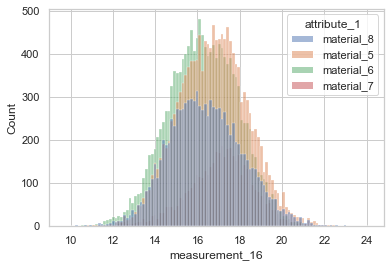

In [42]:
sns.histplot(data = data, x = 'measurement_16', hue = 'attribute_1')

<AxesSubplot:xlabel='measurement_17', ylabel='Count'>

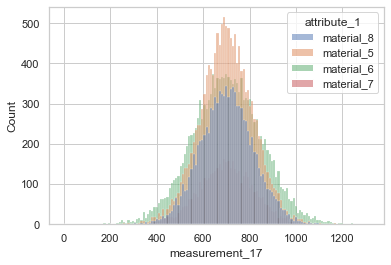

In [43]:
sns.histplot(data = data, x = 'measurement_17', hue = 'attribute_1')

<AxesSubplot:xlabel='measurement_0', ylabel='Count'>

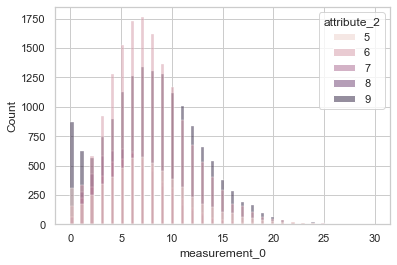

In [44]:
sns.histplot(data = data, x = 'measurement_0', hue = 'attribute_2')

<AxesSubplot:xlabel='measurement_1', ylabel='Count'>

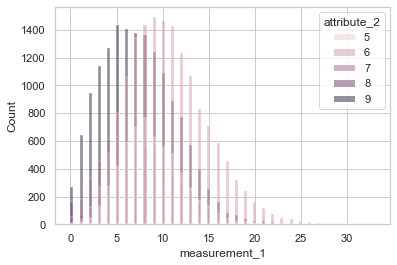

In [45]:
sns.histplot(data = data, x = 'measurement_1', hue = 'attribute_2')

<AxesSubplot:xlabel='measurement_2', ylabel='Count'>

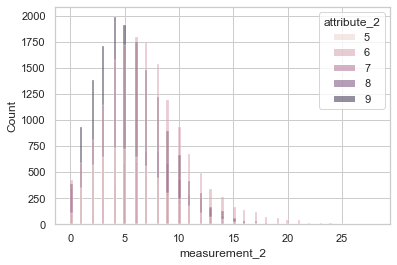

In [46]:
sns.histplot(data = data, x = 'measurement_2', hue = 'attribute_2')

<AxesSubplot:xlabel='measurement_3', ylabel='Count'>

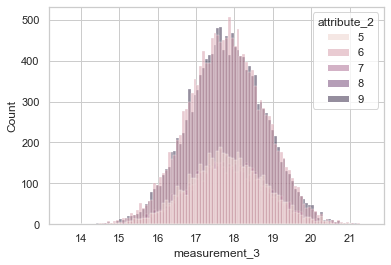

In [47]:
sns.histplot(data = data, x = 'measurement_3', hue = 'attribute_2')

In [48]:
data.isnull().sum()

id                    0
product_code          0
loading             473
attribute_0           0
attribute_1           0
attribute_2           0
attribute_3           0
measurement_0         0
measurement_1         0
measurement_2         0
measurement_3       710
measurement_4       947
measurement_5      1184
measurement_6      1420
measurement_7      1657
measurement_8      1894
measurement_9      2131
measurement_10     2367
measurement_11     2604
measurement_12     2841
measurement_13     3077
measurement_14     3314
measurement_15     3551
measurement_16     3788
measurement_17     4024
failure           20775
dtype: int64

In [49]:
train = pd.read_csv('./data/train.csv')
train

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0
26568,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0


In [50]:
print(train[train['failure'] == 0]['loading'].mean())
print(train[train['failure'] == 1]['loading'].mean())

125.2054950518959
137.51197323818056


In [51]:
print("ISNULL of train.failure = 0")
display(train[train['failure'] == 0].isnull().sum())
print("ISNULL of train.failure = 1")
display(train[train['failure'] == 1].isnull().sum())

ISNULL of train.failure = 0


id                   0
product_code         0
loading            206
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      320
measurement_4      410
measurement_5      504
measurement_6      625
measurement_7      740
measurement_8      830
measurement_9      944
measurement_10    1023
measurement_11    1157
measurement_12    1245
measurement_13    1401
measurement_14    1461
measurement_15    1579
measurement_16    1674
measurement_17    1785
failure              0
dtype: int64

ISNULL of train.failure = 1


id                  0
product_code        0
loading            44
attribute_0         0
attribute_1         0
attribute_2         0
attribute_3         0
measurement_0       0
measurement_1       0
measurement_2       0
measurement_3      61
measurement_4     128
measurement_5     172
measurement_6     171
measurement_7     197
measurement_8     218
measurement_9     283
measurement_10    277
measurement_11    311
measurement_12    356
measurement_13    373
measurement_14    413
measurement_15    430
measurement_16    436
measurement_17    499
failure             0
dtype: int64

In [52]:
train.isnull().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

In [53]:
train_0 = train[train['failure'] == 0]
train_1 = train[train['failure'] == 1]
train_0['loading'].fillna(train[train['failure'] == 0]['loading'].mean(), inplace = True)
train_1['loading'].fillna(train[train['failure'] == 1]['loading'].mean(), inplace = True)

C:\Users\HYOUNG~1\AppData\Local\Temp/ipykernel_9736/4115100979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_0['loading'].fillna(train[train['failure'] == 0]['loading'].mean(), inplace = True)
C:\Users\HYOUNG~1\AppData\Local\Temp/ipykernel_9736/4115100979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_1['loading'].fillna(train[train['failure'] == 1]['loading'].mean(), inplace = True)


In [54]:
train_0.loading.mean()

125.20549505189608

In [55]:
train_1.loading.mean()

137.51197323818062

In [56]:
train = pd.concat([train_0, train_1], ignore_index = True)
train.isnull().sum()

id                   0
product_code         0
loading              0
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

In [57]:
train

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26545,E,100.26,material_7,material_6,6,9,4,19,0,...,10.476,14.399,18.824,12.666,NaN,14.601,14.995,17.420,808.354,1
26566,26546,E,103.60,material_7,material_6,6,9,1,15,3,...,12.265,14.193,19.618,12.310,16.160,15.490,14.522,17.863,731.105,1
26567,26553,E,121.42,material_7,material_6,6,9,1,9,6,...,11.199,14.626,19.368,10.795,14.981,13.140,14.845,15.577,795.590,1
26568,26554,E,159.43,material_7,material_6,6,9,3,13,7,...,10.795,17.600,20.324,12.350,14.607,15.494,15.472,14.185,NaN,1


In [58]:
data = pd.concat([train, test], ignore_index = True)
data

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0.0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0.0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0.0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0.0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47340,47340,I,144.74,material_7,material_5,9,5,0,4,9,...,11.691,NaN,19.771,11.562,17.246,15.131,15.209,NaN,696.466,NaN
47341,47341,I,74.53,material_7,material_5,9,5,4,8,7,...,10.980,16.027,15.694,13.564,15.494,15.296,13.812,16.501,613.249,NaN
47342,47342,I,67.73,material_7,material_5,9,5,10,11,2,...,10.436,16.137,20.612,11.134,16.519,15.525,14.175,17.728,783.349,NaN
47343,47343,I,126.15,material_7,material_5,9,5,8,16,11,...,12.672,15.422,19.496,9.319,15.817,17.403,16.437,15.179,745.210,NaN


In [59]:
data.drop(columns = ['id', 'product_code'], inplace = True)
data

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0.0
1,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0.0
2,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0.0
3,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0.0
4,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47340,144.74,material_7,material_5,9,5,0,4,9,18.465,12.570,...,11.691,NaN,19.771,11.562,17.246,15.131,15.209,NaN,696.466,NaN
47341,74.53,material_7,material_5,9,5,4,8,7,18.900,9.896,...,10.980,16.027,15.694,13.564,15.494,15.296,13.812,16.501,613.249,NaN
47342,67.73,material_7,material_5,9,5,10,11,2,18.656,NaN,...,10.436,16.137,20.612,11.134,16.519,15.525,14.175,17.728,783.349,NaN
47343,126.15,material_7,material_5,9,5,8,16,11,16.536,11.226,...,12.672,15.422,19.496,9.319,15.817,17.403,16.437,15.179,745.210,NaN


In [60]:
data['attribute_0'].unique()

array(['material_7', 'material_5'], dtype=object)

In [61]:
data['attribute_1'].unique()

array(['material_8', 'material_5', 'material_6', 'material_7'],
      dtype=object)

In [62]:
data['material_5'] = 0
data['material_6'] = 0
data['material_7'] = 0
data['material_8'] = 0
data.drop(columns = ['failure'], inplace = True)
data

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,material_5,material_6,material_7,material_8
0,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,...,15.193,15.029,NaN,13.034,14.684,764.100,0,0,0,0
1,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,...,11.755,14.732,15.425,14.395,15.631,682.057,0,0,0,0
2,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,...,13.798,16.711,18.631,14.094,17.946,663.376,0,0,0,0
3,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,...,10.020,15.250,15.562,16.154,17.172,826.282,0,0,0,0
4,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,...,12.428,16.182,12.760,13.153,16.412,579.885,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47340,144.74,material_7,material_5,9,5,0,4,9,18.465,12.570,...,11.562,17.246,15.131,15.209,NaN,696.466,0,0,0,0
47341,74.53,material_7,material_5,9,5,4,8,7,18.900,9.896,...,13.564,15.494,15.296,13.812,16.501,613.249,0,0,0,0
47342,67.73,material_7,material_5,9,5,10,11,2,18.656,NaN,...,11.134,16.519,15.525,14.175,17.728,783.349,0,0,0,0
47343,126.15,material_7,material_5,9,5,8,16,11,16.536,11.226,...,9.319,15.817,17.403,16.437,15.179,745.210,0,0,0,0


In [63]:
for i in range(len(data)):
    if data.loc[i, 'attribute_0'] == 'material_5':
        data.loc[i, 'material_5'] = 1
    elif data.loc[i, 'attribute_0'] == 'material_6':
        data.loc[i, 'material_6'] = 1
    elif data.loc[i, 'attribute_0'] == 'material_7':
        data.loc[i, 'material_7'] = 1
    elif data.loc[i, 'attribute_0'] == 'material_8':
        data.loc[i, 'material_8'] = 1

data

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,material_5,material_6,material_7,material_8
0,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,...,15.193,15.029,NaN,13.034,14.684,764.100,0,0,1,0
1,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,...,11.755,14.732,15.425,14.395,15.631,682.057,0,0,1,0
2,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,...,13.798,16.711,18.631,14.094,17.946,663.376,0,0,1,0
3,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,...,10.020,15.250,15.562,16.154,17.172,826.282,0,0,1,0
4,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,...,12.428,16.182,12.760,13.153,16.412,579.885,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47340,144.74,material_7,material_5,9,5,0,4,9,18.465,12.570,...,11.562,17.246,15.131,15.209,NaN,696.466,0,0,1,0
47341,74.53,material_7,material_5,9,5,4,8,7,18.900,9.896,...,13.564,15.494,15.296,13.812,16.501,613.249,0,0,1,0
47342,67.73,material_7,material_5,9,5,10,11,2,18.656,NaN,...,11.134,16.519,15.525,14.175,17.728,783.349,0,0,1,0
47343,126.15,material_7,material_5,9,5,8,16,11,16.536,11.226,...,9.319,15.817,17.403,16.437,15.179,745.210,0,0,1,0


In [64]:
for i in range(len(data)):
    if data.loc[i, 'attribute_1'] == 'material_5':
        data.loc[i, 'material_5'] = 1
    elif data.loc[i, 'attribute_1'] == 'material_6':
        data.loc[i, 'material_6'] = 1
    elif data.loc[i, 'attribute_1'] == 'material_7':
        data.loc[i, 'material_7'] = 1
    elif data.loc[i, 'attribute_1'] == 'material_8':
        data.loc[i, 'material_8'] = 1

data

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,material_5,material_6,material_7,material_8
0,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,...,15.193,15.029,NaN,13.034,14.684,764.100,0,0,1,1
1,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,...,11.755,14.732,15.425,14.395,15.631,682.057,0,0,1,1
2,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,...,13.798,16.711,18.631,14.094,17.946,663.376,0,0,1,1
3,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,...,10.020,15.250,15.562,16.154,17.172,826.282,0,0,1,1
4,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,...,12.428,16.182,12.760,13.153,16.412,579.885,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47340,144.74,material_7,material_5,9,5,0,4,9,18.465,12.570,...,11.562,17.246,15.131,15.209,NaN,696.466,1,0,1,0
47341,74.53,material_7,material_5,9,5,4,8,7,18.900,9.896,...,13.564,15.494,15.296,13.812,16.501,613.249,1,0,1,0
47342,67.73,material_7,material_5,9,5,10,11,2,18.656,NaN,...,11.134,16.519,15.525,14.175,17.728,783.349,1,0,1,0
47343,126.15,material_7,material_5,9,5,8,16,11,16.536,11.226,...,9.319,15.817,17.403,16.437,15.179,745.210,1,0,1,0


In [65]:
data.drop(columns = ['attribute_0', 'attribute_1'], inplace = True)
data

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,material_5,material_6,material_7,material_8
0,80.10,9,5,7,8,4,18.040,12.518,15.748,19.292,...,15.193,15.029,NaN,13.034,14.684,764.100,0,0,1,1
1,84.89,9,5,14,3,3,18.213,11.540,17.717,17.893,...,11.755,14.732,15.425,14.395,15.631,682.057,0,0,1,1
2,82.43,9,5,12,1,5,18.057,11.652,16.738,18.240,...,13.798,16.711,18.631,14.094,17.946,663.376,0,0,1,1
3,101.07,9,5,13,2,6,17.295,11.188,18.576,18.339,...,10.020,15.250,15.562,16.154,17.172,826.282,0,0,1,1
4,188.06,9,5,9,2,8,19.346,12.950,16.990,15.746,...,12.428,16.182,12.760,13.153,16.412,579.885,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47340,144.74,9,5,0,4,9,18.465,12.570,18.146,17.089,...,11.562,17.246,15.131,15.209,NaN,696.466,1,0,1,0
47341,74.53,9,5,4,8,7,18.900,9.896,18.288,NaN,...,13.564,15.494,15.296,13.812,16.501,613.249,1,0,1,0
47342,67.73,9,5,10,11,2,18.656,NaN,18.242,17.910,...,11.134,16.519,15.525,14.175,17.728,783.349,1,0,1,0
47343,126.15,9,5,8,16,11,16.536,11.226,18.144,17.250,...,9.319,15.817,17.403,16.437,15.179,745.210,1,0,1,0


In [66]:
(len(train) + len(test)) == len(data)

True

In [68]:
train_m = data[:len(train)]
test_m = data[len(train):]
len(train_m) == len(train)

True

In [69]:
len(test_m) == len(test)

True

In [70]:
train_m = pd.concat([train_m, target], axis = 1)
train_m

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,material_5,material_6,material_7,material_8,failure
0,80.10,9,5,7,8,4,18.040,12.518,15.748,19.292,...,15.029,NaN,13.034,14.684,764.100,0,0,1,1,0
1,84.89,9,5,14,3,3,18.213,11.540,17.717,17.893,...,14.732,15.425,14.395,15.631,682.057,0,0,1,1,0
2,82.43,9,5,12,1,5,18.057,11.652,16.738,18.240,...,16.711,18.631,14.094,17.946,663.376,0,0,1,1,0
3,101.07,9,5,13,2,6,17.295,11.188,18.576,18.339,...,15.250,15.562,16.154,17.172,826.282,0,0,1,1,0
4,188.06,9,5,9,2,8,19.346,12.950,16.990,15.746,...,16.182,12.760,13.153,16.412,579.885,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,100.26,6,9,4,19,0,18.271,10.381,17.773,18.459,...,NaN,14.601,14.995,17.420,808.354,0,1,1,0,0
26566,103.60,6,9,1,15,3,15.835,12.629,16.460,17.414,...,16.160,15.490,14.522,17.863,731.105,0,1,1,0,0
26567,121.42,6,9,1,9,6,18.186,10.698,17.157,19.184,...,14.981,13.140,14.845,15.577,795.590,0,1,1,0,0
26568,159.43,6,9,3,13,7,19.029,12.330,17.263,NaN,...,14.607,15.494,15.472,14.185,NaN,0,1,1,0,0


In [71]:
train_m.isnull().sum()

loading              0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
material_5           0
material_6           0
material_7           0
material_8           0
failure              0
dtype: int64

In [104]:
train_th = pd.concat([train_m, target], ignore_index = True)
train_th = train_m.dropna(thresh = 25)
train_th

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,material_5,material_6,material_7,material_8,failure
0,80.10,9,5,7,8,4,18.040,12.518,15.748,19.292,...,15.029,NaN,13.034,14.684,764.100,0,0,1,1,0
1,84.89,9,5,14,3,3,18.213,11.540,17.717,17.893,...,14.732,15.425,14.395,15.631,682.057,0,0,1,1,0
2,82.43,9,5,12,1,5,18.057,11.652,16.738,18.240,...,16.711,18.631,14.094,17.946,663.376,0,0,1,1,0
3,101.07,9,5,13,2,6,17.295,11.188,18.576,18.339,...,15.250,15.562,16.154,17.172,826.282,0,0,1,1,0
4,188.06,9,5,9,2,8,19.346,12.950,16.990,15.746,...,16.182,12.760,13.153,16.412,579.885,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26562,115.21,6,9,10,11,5,17.717,12.185,16.797,17.527,...,16.469,17.817,14.184,16.161,656.769,0,1,1,0,0
26563,169.75,6,9,1,10,8,17.794,12.233,14.508,18.516,...,16.818,13.591,16.743,NaN,589.551,0,1,1,0,0
26564,168.34,6,9,6,7,9,16.673,13.032,15.016,19.396,...,16.162,18.079,14.169,NaN,940.590,0,1,1,0,0
26566,103.60,6,9,1,15,3,15.835,12.629,16.460,17.414,...,16.160,15.490,14.522,17.863,731.105,0,1,1,0,0


In [105]:
from sklearn.impute import KNNImputer

X_m = train_m.drop(columns = ['failure'])
X_th = train_th.drop(columns = ['failure'])
display(X_m)
display(X_th)

imputer1 = KNNImputer(n_neighbors=2)
imputer2 = KNNImputer(n_neighbors=2)
imputed1 = imputer1.fit(X_m)
imputed2 = imputer2.fit(X_th)
imputed1 = imputer1.transform(X_m)
imputed2 = imputer2.transform(X_th)

test_m = pd.DataFrame(imputed1, columns=test_m.columns)
test_th = pd.DataFrame(imputed2, columns = test_m.columns)
test_m.info()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,material_5,material_6,material_7,material_8
0,80.10,9,5,7,8,4,18.040,12.518,15.748,19.292,...,15.193,15.029,NaN,13.034,14.684,764.100,0,0,1,1
1,84.89,9,5,14,3,3,18.213,11.540,17.717,17.893,...,11.755,14.732,15.425,14.395,15.631,682.057,0,0,1,1
2,82.43,9,5,12,1,5,18.057,11.652,16.738,18.240,...,13.798,16.711,18.631,14.094,17.946,663.376,0,0,1,1
3,101.07,9,5,13,2,6,17.295,11.188,18.576,18.339,...,10.020,15.250,15.562,16.154,17.172,826.282,0,0,1,1
4,188.06,9,5,9,2,8,19.346,12.950,16.990,15.746,...,12.428,16.182,12.760,13.153,16.412,579.885,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,100.26,6,9,4,19,0,18.271,10.381,17.773,18.459,...,12.666,NaN,14.601,14.995,17.420,808.354,0,1,1,0
26566,103.60,6,9,1,15,3,15.835,12.629,16.460,17.414,...,12.310,16.160,15.490,14.522,17.863,731.105,0,1,1,0
26567,121.42,6,9,1,9,6,18.186,10.698,17.157,19.184,...,10.795,14.981,13.140,14.845,15.577,795.590,0,1,1,0
26568,159.43,6,9,3,13,7,19.029,12.330,17.263,NaN,...,12.350,14.607,15.494,15.472,14.185,NaN,0,1,1,0


,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,material_5,material_6,material_7,material_8
0,80.10,9,5,7,8,4,18.040,12.518,15.748,19.292,...,15.193,15.029,NaN,13.034,14.684,764.100,0,0,1,1
1,84.89,9,5,14,3,3,18.213,11.540,17.717,17.893,...,11.755,14.732,15.425,14.395,15.631,682.057,0,0,1,1
2,82.43,9,5,12,1,5,18.057,11.652,16.738,18.240,...,13.798,16.711,18.631,14.094,17.946,663.376,0,0,1,1
3,101.07,9,5,13,2,6,17.295,11.188,18.576,18.339,...,10.020,15.250,15.562,16.154,17.172,826.282,0,0,1,1
4,188.06,9,5,9,2,8,19.346,12.950,16.990,15.746,...,12.428,16.182,12.760,13.153,16.412,579.885,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26562,115.21,6,9,10,11,5,17.717,12.185,16.797,17.527,...,13.186,16.469,17.817,14.184,16.161,656.769,0,1,1,0
26563,169.75,6,9,1,10,8,17.794,12.233,14.508,18.516,...,14.588,16.818,13.591,16.743,NaN,589.551,0,1,1,0
26564,168.34,6,9,6,7,9,16.673,13.032,15.016,19.396,...,10.967,16.162,18.079,14.169,NaN,940.590,0,1,1,0
26566,103.60,6,9,1,15,3,15.835,12.629,16.460,17.414,...,12.310,16.160,15.490,14.522,17.863,731.105,0,1,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loading         26570 non-null  float64
 1   attribute_2     26570 non-null  float64
 2   attribute_3     26570 non-null  float64
 3   measurement_0   26570 non-null  float64
 4   measurement_1   26570 non-null  float64
 5   measurement_2   26570 non-null  float64
 6   measurement_3   26570 non-null  float64
 7   measurement_4   26570 non-null  float64
 8   measurement_5   26570 non-null  float64
 9   measurement_6   26570 non-null  float64
 10  measurement_7   26570 non-null  float64
 11  measurement_8   26570 non-null  float64
 12  measurement_9   26570 non-null  float64
 13  measurement_10  26570 non-null  float64
 14  measurement_11  26570 non-null  float64
 15  measurement_12  26570 non-null  float64
 16  measurement_13  26570 non-null  float64
 17  measurement_14  26570 non-null 

In [75]:
test_th.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21962 entries, 0 to 21961
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loading         21962 non-null  float64
 1   attribute_2     21962 non-null  float64
 2   attribute_3     21962 non-null  float64
 3   measurement_0   21962 non-null  float64
 4   measurement_1   21962 non-null  float64
 5   measurement_2   21962 non-null  float64
 6   measurement_3   21962 non-null  float64
 7   measurement_4   21962 non-null  float64
 8   measurement_5   21962 non-null  float64
 9   measurement_6   21962 non-null  float64
 10  measurement_7   21962 non-null  float64
 11  measurement_8   21962 non-null  float64
 12  measurement_9   21962 non-null  float64
 13  measurement_10  21962 non-null  float64
 14  measurement_11  21962 non-null  float64
 15  measurement_12  21962 non-null  float64
 16  measurement_13  21962 non-null  float64
 17  measurement_14  21962 non-null 

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model2 = RandomForestClassifier()

In [83]:
X_m = pd.DataFrame(imputed1, columns = train_m.drop(columns = ['failure']).columns)

In [84]:
X_m.isnull().sum()

loading           0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
material_5        0
material_6        0
material_7        0
material_8        0
dtype: int64

In [86]:
X_th = pd.DataFrame(imputed2, columns = train_m.drop(columns = ['failure']).columns)

In [88]:
X_m = pd.concat([X_m, target], axis = 1)
X_m

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,material_5,material_6,material_7,material_8,failure
0,80.10,9.0,5.0,7.0,8.0,4.0,18.040,12.518,15.748,19.2920,...,15.0290,14.2125,13.034,14.684,764.100,0.0,0.0,1.0,1.0,0
1,84.89,9.0,5.0,14.0,3.0,3.0,18.213,11.540,17.717,17.8930,...,14.7320,15.4250,14.395,15.631,682.057,0.0,0.0,1.0,1.0,0
2,82.43,9.0,5.0,12.0,1.0,5.0,18.057,11.652,16.738,18.2400,...,16.7110,18.6310,14.094,17.946,663.376,0.0,0.0,1.0,1.0,0
3,101.07,9.0,5.0,13.0,2.0,6.0,17.295,11.188,18.576,18.3390,...,15.2500,15.5620,16.154,17.172,826.282,0.0,0.0,1.0,1.0,0
4,188.06,9.0,5.0,9.0,2.0,8.0,19.346,12.950,16.990,15.7460,...,16.1820,12.7600,13.153,16.412,579.885,0.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,100.26,6.0,9.0,4.0,19.0,0.0,18.271,10.381,17.773,18.4590,...,14.9945,14.6010,14.995,17.420,808.354,0.0,1.0,1.0,0.0,0
26566,103.60,6.0,9.0,1.0,15.0,3.0,15.835,12.629,16.460,17.4140,...,16.1600,15.4900,14.522,17.863,731.105,0.0,1.0,1.0,0.0,0
26567,121.42,6.0,9.0,1.0,9.0,6.0,18.186,10.698,17.157,19.1840,...,14.9810,13.1400,14.845,15.577,795.590,0.0,1.0,1.0,0.0,0
26568,159.43,6.0,9.0,3.0,13.0,7.0,19.029,12.330,17.263,17.5785,...,14.6070,15.4940,15.472,14.185,604.887,0.0,1.0,1.0,0.0,0


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_m.drop(columns = ['failure']), target, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19927, 25) (6643, 25) (19927,) (6643,)


In [92]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
from sklearn.metrics import roc_auc_score

In [94]:
predict = model.predict(X_test)
score = roc_auc_score(y_test, predict)

print(score)

0.5


In [115]:
predict = model.predict(test_m)

In [124]:
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [125]:
predict = pd.DataFrame(predict)

In [127]:
predict = pd.concat([test['id'], predict], axis = 1)
predict

,id,0
0,26570.0,0
1,26571.0,0
2,26572.0,0
3,26573.0,0
4,26574.0,0
...,...,...
26565,NaN,0
26566,NaN,0
26567,NaN,0
26568,NaN,0


In [128]:
predict.columns = ['id', 'failure']
predict

,id,failure
0,26570.0,0
1,26571.0,0
2,26572.0,0
3,26573.0,0
4,26574.0,0
...,...,...
26565,NaN,0
26566,NaN,0
26567,NaN,0
26568,NaN,0


In [129]:
test

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,47340,I,144.74,material_7,material_5,9,5,0,4,9,...,18.573,11.691,NaN,19.771,11.562,17.246,15.131,15.209,NaN,696.466
20771,47341,I,74.53,material_7,material_5,9,5,4,8,7,...,17.917,10.980,16.027,15.694,13.564,15.494,15.296,13.812,16.501,613.249
20772,47342,I,67.73,material_7,material_5,9,5,10,11,2,...,19.630,10.436,16.137,20.612,11.134,16.519,15.525,14.175,17.728,783.349
20773,47343,I,126.15,material_7,material_5,9,5,8,16,11,...,19.575,12.672,15.422,19.496,9.319,15.817,17.403,16.437,15.179,745.210
